In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set_style("dark")
sns.set_palette("GnBu_d")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [3]:
df = pd.read_csv("../data/raw/financial_data.csv")
df.head()

,Ticker,Date,totalEsg,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,furLeather,gambling,gmo,militaryContract,nuclear,pesticides,palmOil,coal,tobacco,ratingDate
0,XOM,2023-12-31,43.66,0.0,0.330,7.427300e+10,3.601000e+10,2.064100e+10,2.505550e+11,7.427300e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
1,XOM,2022-12-31,43.66,0.0,0.330,1.025910e+11,5.574000e+10,2.404000e+10,2.956080e+11,1.025910e+11,...,False,False,False,False,False,False,False,False,False,2025-02-01
2,XOM,2021-12-31,43.66,0.0,0.310,5.278800e+10,2.304000e+10,2.060700e+10,2.118060e+11,5.278800e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
3,XOM,2020-12-31,43.66,0.0,0.170,1.828400e+10,-2.244000e+10,4.600900e+10,1.704470e+11,1.828400e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
4,CVX,2023-12-31,38.36,0.0,0.276,4.504200e+10,2.136900e+10,1.498900e+10,1.365220e+11,4.504200e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01


In [5]:
df.columns.tolist()

['Ticker',
 'Date',
 'totalEsg',
 'Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Minority Interests',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Earnings From Equity Interest',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Operating Income',
 'Operating Expense',
 'Other Operating Expenses',
 'Other Taxes',
 'Selling General 

In [ ]:
# checking which columns aren't null
df.columns[~df.isna().any()]

Index(['Ticker', 'Date', 'totalEsg', 'maxAge', 'ratingYear', 'ratingMonth',
       'highestControversy', 'peerCount', 'esgPerformance', 'peerGroup',
       'peerEsgScorePerformance', 'peerGovernancePerformance',
       'peerSocialPerformance', 'peerEnvironmentPerformance',
       'peerHighestControversyPerformance', 'adult', 'alcoholic',
       'animalTesting', 'controversialWeapons', 'smallArms', 'furLeather',
       'gambling', 'gmo', 'militaryContract', 'nuclear', 'pesticides',
       'palmOil', 'coal', 'tobacco', 'ratingDate'],
      dtype='object')

basically all the financial data has missing values somewhere that needs to be further analyzed

In [17]:
null_columns = df.columns[df.isna().any()]

In [22]:
df[null_columns].isna().sum()

Tax Effect Of Unusual Items                                     98
Tax Rate For Calcs                                              98
Normalized EBITDA                                              261
Net Income From Continuing Operation Net Minority Interest      98
Reconciled Depreciation                                        110
                                                              ... 
percentile                                                    1378
environmentPercentile                                         1530
socialPercentile                                              1530
governancePercentile                                          1530
catholic                                                      1378
Length: 348, dtype: int64

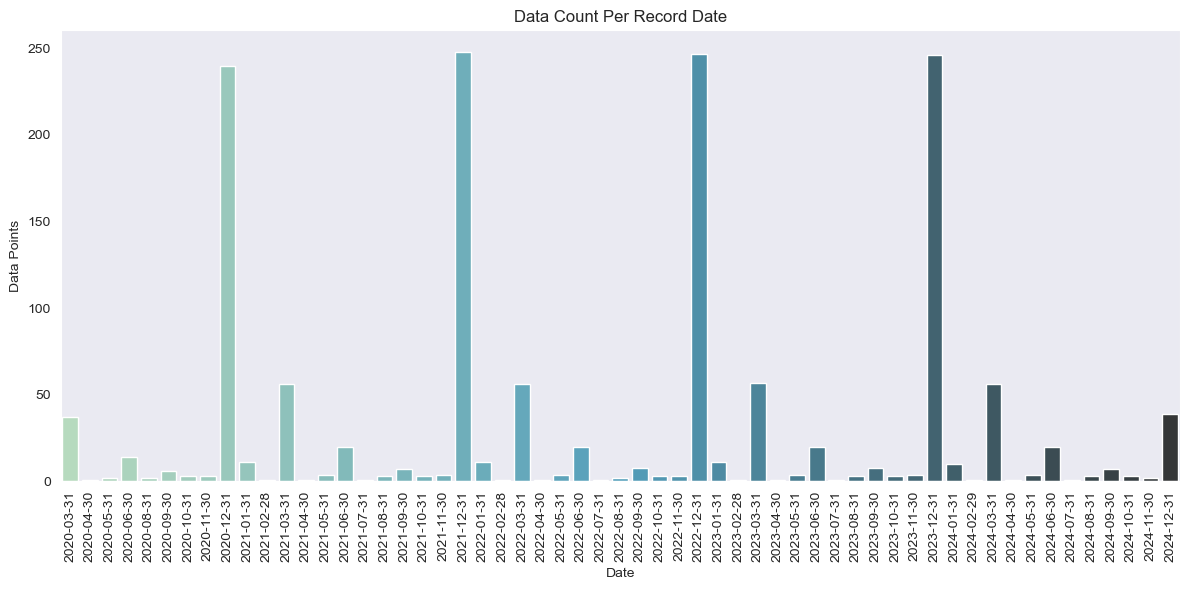

In [64]:
date_counts = df.groupby('Date').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
colors = sns.color_palette("GnBu_d", len(date_counts))
sns.barplot(data=date_counts, x='Date', y='count', palette=colors, hue='Date', legend=False)

plt.xticks(rotation=90) 
plt.xlabel("Date")
plt.ylabel("Data Points")
plt.title("Data Count Per Record Date")
plt.tight_layout()
plt.show()

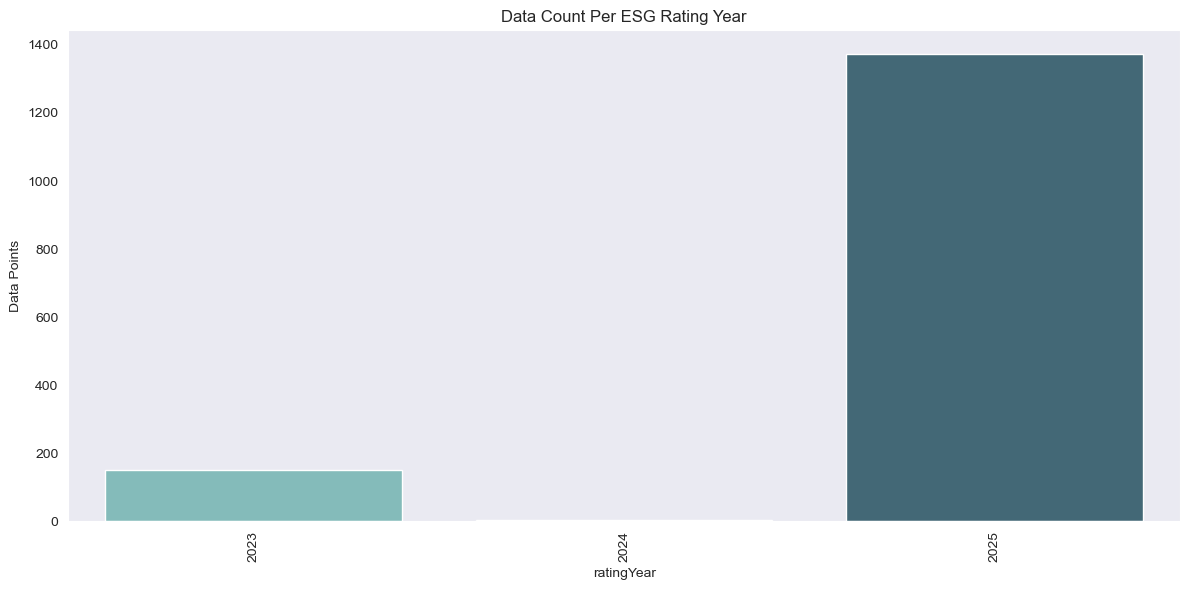

In [65]:
date_counts = df.groupby('ratingYear').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
colors = sns.color_palette("GnBu_d", len(date_counts))
sns.barplot(data=date_counts, x='ratingYear', y='count', palette=colors, hue='ratingYear', legend=False)

plt.xticks(rotation=90) 
plt.xlabel("ratingYear")
plt.ylabel("Data Points")
plt.title("Data Count Per ESG Rating Year")
plt.tight_layout()
plt.show()